In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Import data and calculate spending per capita

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.transit_spending = data.transit_spending.apply(lambda i: int(i[1:-3].replace(',', '')))

In [4]:
data.head()

,area,census_division,city,city_type,population,transit_spending
0,16.9/km2,Hastings,Bancroft,Town,3880,71249
1,"1,428.0/km2",Simcoe,Barrie,City,136063,22017099
2,25.5/km2,Muskoka,Bracebridge,Town,15414,126394
3,"2,228.7/km2",Peel,Brampton,City,523906,166780412
4,"1,345.9/km2",Brant,Brantford,City,93650,12002944


In [5]:
data['spending_per_capita'] = data.transit_spending/ data.population

In [6]:
data[data.city == 'Hamilton']

,area,census_division,city,city_type,population,transit_spending,spending_per_capita
22,480.6/km2,Hamilton,Hamilton,City,519949,109008019,209.651368
23,42.7/km2,Northumberland,Hamilton,Township,10702,109008019,10185.761446


In [8]:
data[data.population == 10702]

,area,census_division,city,city_type,population,transit_spending,spending_per_capita
23,42.7/km2,Northumberland,Hamilton,Township,10702,109008019,10185.761446


In [9]:
data = data[data.population != 10702]

# Plot data with Seaborn

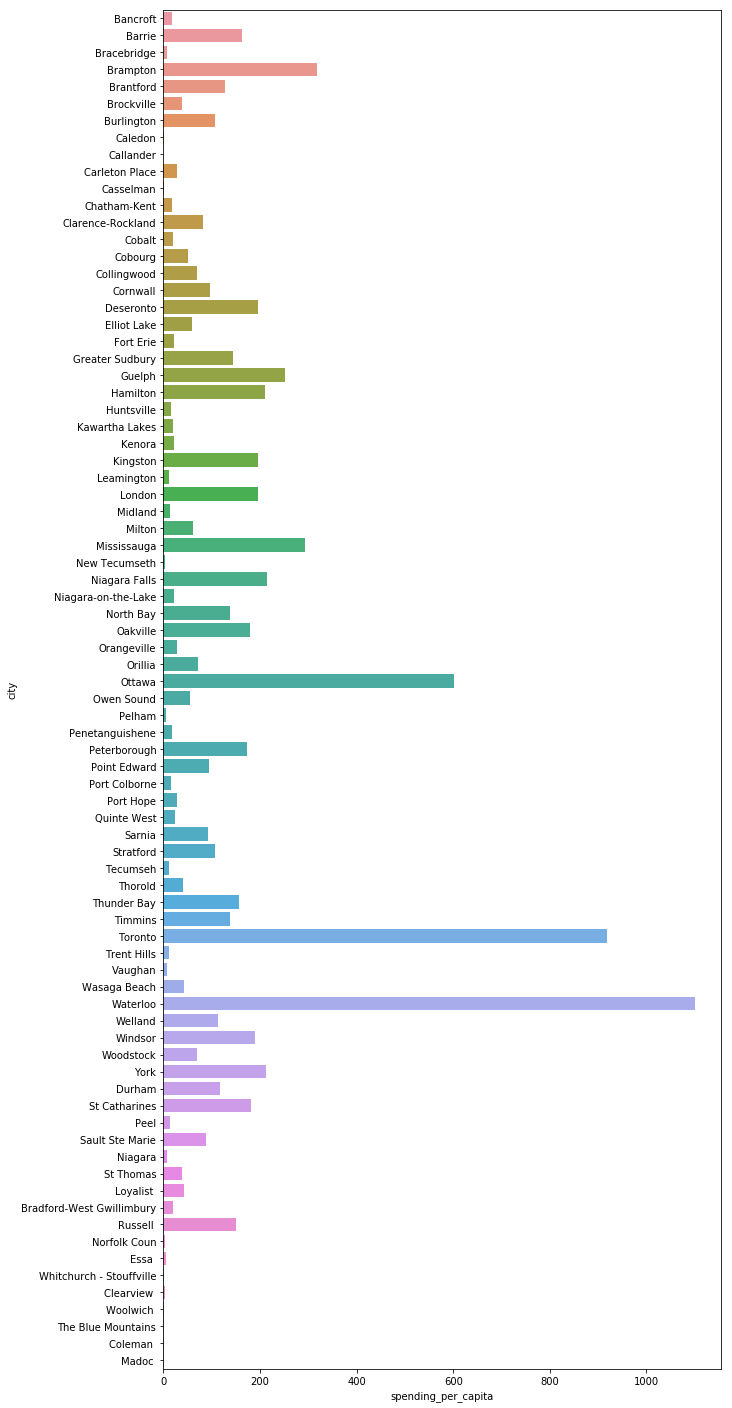

In [10]:
plt.figure(figsize=(10,25))
sns.barplot(y='city', x='spending_per_capita', data=data)

# Plot data with Plotly.py

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go

In [12]:
cities = list(data.city)
data.spending_per_capita = data.spending_per_capita.apply(lambda i: '${:,.2f}'.format(round(i, 2)))
spending_per_capita = list(data.spending_per_capita)
cities, spending_per_capita = (list(t) for t in zip(*sorted(zip(cities, spending_per_capita),reverse=True)))
print(spending_per_capita)

['$211.95', '$0.73', '$69.14', '$189.97', '$1.87', '$113.60', '$1,099.99', '$42.29', '$6.64', '$12.01', '$919.01', '$138.54', '$155.73', '$41.48', '$2.39', '$12.33', '$107.19', '$39.40', '$181.47', '$88.10', '$92.32', '$149.92', '$23.81', '$29.12', '$16.33', '$93.69', '$172.85', '$18.17', '$6.02', '$13.24', '$56.01', '$600.75', '$72.18', '$29.14', '$179.76', '$138.70', '$4.11', '$21.53', '$214.30', '$7.81', '$4.08', '$292.23', '$62.33', '$14.58', '$0.65', '$42.82', '$195.31', '$10.87', '$195.22', '$22.33', '$20.26', '$15.76', '$209.65', '$252.45', '$144.68', '$22.18', '$6.19', '$59.00', '$116.55', '$196.32', '$97.31', '$69.28', '$1.69', '$50.09', '$20.52', '$3.18', '$81.74', '$17.49', '$1.25', '$27.83', '$0.23', '$0.92', '$106.77', '$38.15', '$128.17', '$318.34', '$20.51', '$8.20', '$161.82', '$18.36']


In [13]:
graph_data = [go.Bar(
            x=spending_per_capita,
            y=cities,
            orientation = 'h',
            marker=dict(
                color='rgba(50, 171, 96, 0.6)',
                line=dict(
                    color='rgba(50, 171, 96, 1.0)',
                    width=1),),
            name='Ontario transit spending per capita'
    
    )]
layout = go.Layout(
    title='Ontario Municipal per Capita Transit Spending',
    xaxis=dict(
        title='Per Capita Spending ($/person)'
    ),
    autosize=False,
    width=590,
    height=1500,
    margin=go.Margin(
        l=200
    ),
    paper_bgcolor='rgb(226, 224, 222)',
    plot_bgcolor='rgb(226, 224, 222)'
)

fig = go.Figure(data=graph_data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [16]:
cities = list(data.city)
populations = list(data.population)
spending_per_capita = list(data.spending_per_capita)
populations, cities, spending_per_capita = (list(t) for t in zip(*sorted(zip(populations, cities, spending_per_capita),reverse=True)))
print(spending_per_capita)

['$919.01', '$13.24', '$211.95', '$600.75', '$292.23', '$116.55', '$318.34', '$209.65', '$7.81', '$195.31', '$6.64', '$189.97', '$179.76', '$106.77', '$144.68', '$161.82', '$181.47', '$195.22', '$252.45', '$155.73', '$17.49', '$1,099.99', '$128.17', '$62.33', '$214.30', '$172.85', '$88.10', '$20.26', '$92.32', '$4.11', '$0.92', '$138.70', '$113.60', '$97.31', '$1.87', '$138.54', '$23.81', '$39.40', '$69.14', '$20.51', '$107.19', '$72.18', '$4.08', '$22.18', '$10.87', '$29.14', '$0.73', '$12.33', '$81.74', '$38.15', '$56.01', '$6.19', '$69.28', '$15.76', '$50.09', '$16.33', '$41.48', '$42.29', '$42.82', '$6.02', '$14.58', '$29.12', '$8.20', '$21.53', '$22.33', '$3.18', '$12.01', '$59.00', '$27.83', '$18.17', '$2.39', '$149.92', '$18.36', '$0.23', '$1.25', '$93.69', '$196.32', '$0.65', '$1.69', '$20.52']


In [17]:
graph_data = [go.Bar(
            x=spending_per_capita,
            y=cities,
            orientation = 'h',
            marker=dict(
                color='rgba(50, 171, 96, 0.6)',
                line=dict(
                    color='rgba(50, 171, 96, 1.0)',
                    width=1),),
            name='Ontario transit spending per capita'
    
    )]
layout = go.Layout(
    title='Ontario Municipal per Capita Transit Spending',
    xaxis=dict(
        title='Per Capita Spending ($/person)'
    ),
    autosize=False,
    width=590,
    height=1500,
    margin=go.Margin(
        l=200
    ),
    paper_bgcolor='rgb(226, 224, 222)',
    plot_bgcolor='rgb(226, 224, 222)'
)

fig = go.Figure(data=graph_data, layout=layout)

py.iplot(fig, filename='transit_sorted_by_pop')